_Computasdag 3.2.2018_

![Computas](img/computas_blue_logo_transparent.png)

Notebook based on https://www.kaggle.com/futurist/pima-data-visualisation-and-machine-learning, released under the [Apache 2.0](http://www.apache.org/licenses/LICENSE-2.0) open source license. 


# Introduction
This notebook demos Data Visualisation and various Machine Learning Classification algorithms on Pima Indians dataset.



In [32]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("pN4HqWRybwk")

# 1. Loading Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %config InlineBackend.figure_formats = ['retina']
# import warnings
# warnings.filterwarnings('ignore')

# 2. Data

In [33]:
pima = pd.read_csv("diabetes.csv") # pandas.core.frame.DataFrame

In [35]:
pima.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [9]:
pima.shape

(768, 9)

In [23]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
pima.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

# 3. Data Visualisation

Histogram: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C074A9DD8>,
      dtype=object)

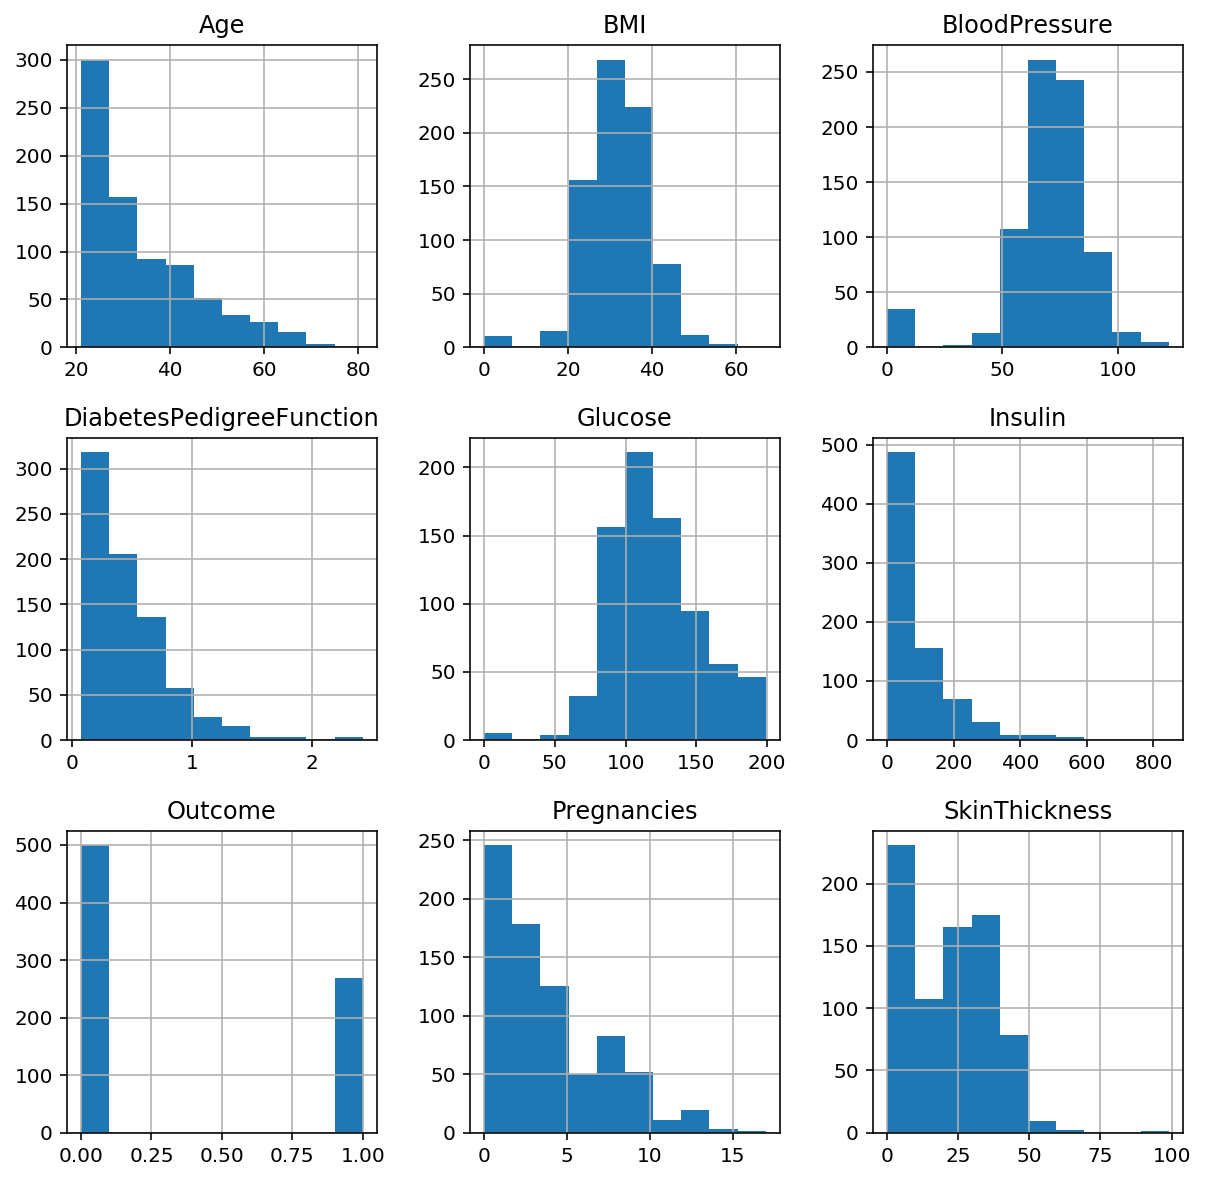

In [51]:
pima.hist(figsize=(10,10))

Boxplot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html    

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

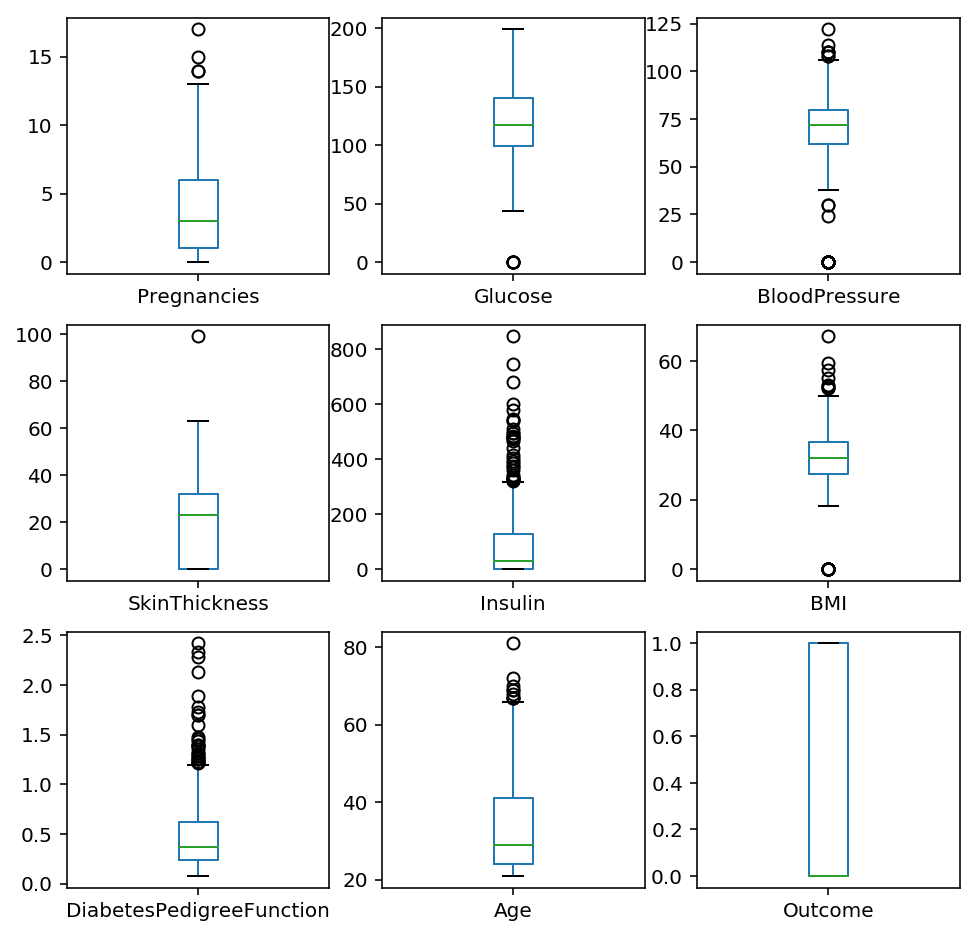

In [94]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))

In [95]:
X_columns = pima.columns[0:len(pima.columns) - 1]

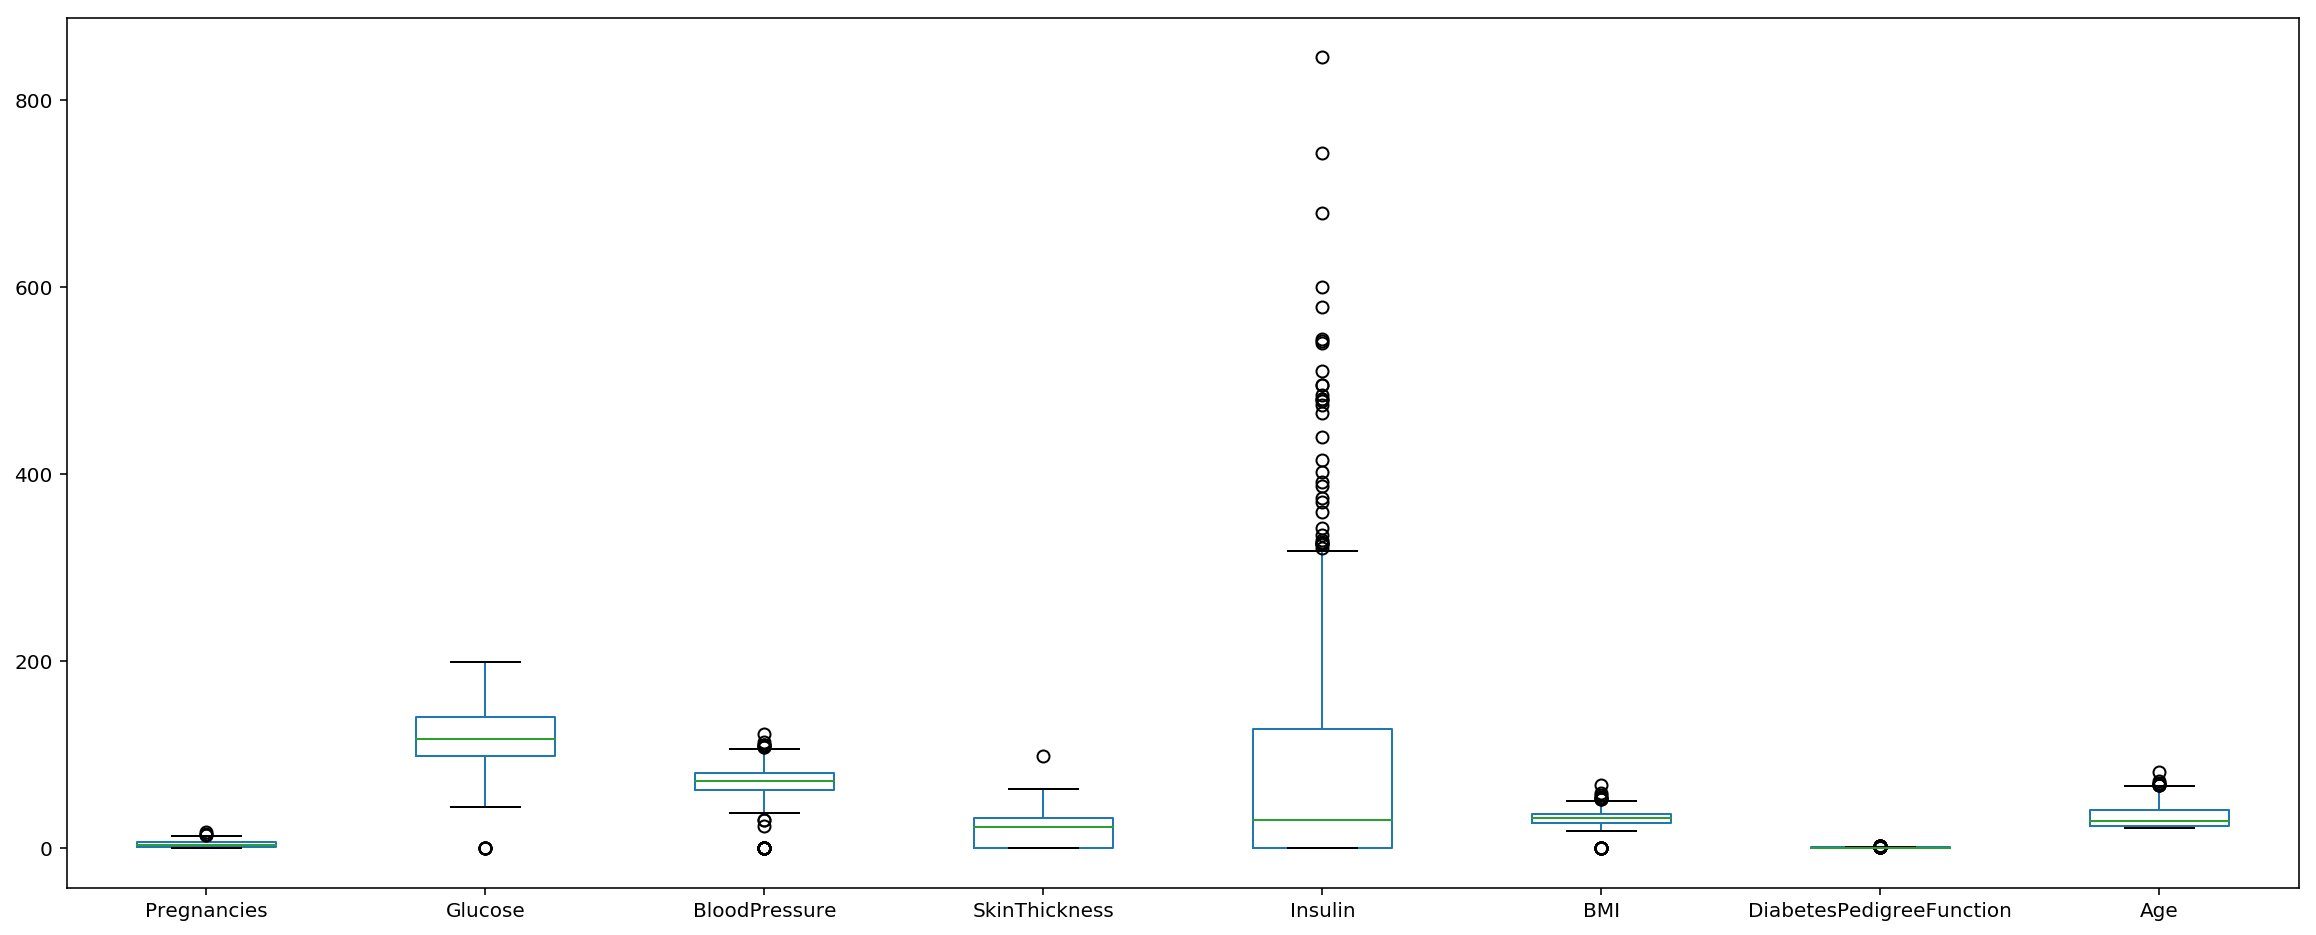

In [96]:
pima[X_columns].plot(kind= 'box', subplots=False, figsize=(20,8))

Correlations between parameters: https://seaborn.pydata.org/generated/seaborn.heatmap.html        

In [92]:
correlations = pima[pima.columns].corr()

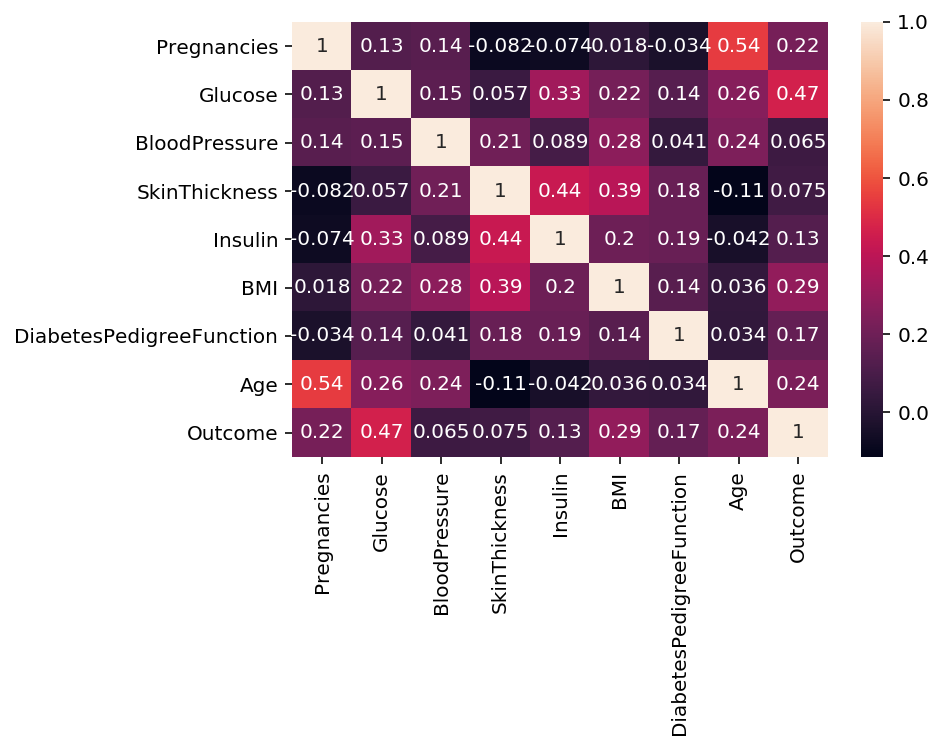

In [93]:
sns.heatmap(correlations, annot = True)

# 4) Feature Extraction

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [59]:
fit = select_top_4.fit(X,Y)
features = fit.transform(X)

In [60]:
features[0:5]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

In [61]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


So, the top performing features are Glucose, Insulin, BMI, Age 

In [62]:
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])

In [63]:
X_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [64]:
Y = pima.iloc[:,8]

In [65]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#  5) Standardization
It changes the attribute values to Guassian distribution with mean as 0 and standard deviation as 1. It is useful when the algorithm expects the input features to be in Guassian distribution.

In [66]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

In [67]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

In [68]:
X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


# 6) Binary Classification

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [71]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [72]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.7768905341089372
NB 0.7604970914859862
KNN 0.7459280803807509
DT 0.7003966155473293
SVM 0.776890534108937


# 7) Visualising Results

[Text(0,0,'LR'),
 Text(0,0,'NB'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'SVM')]

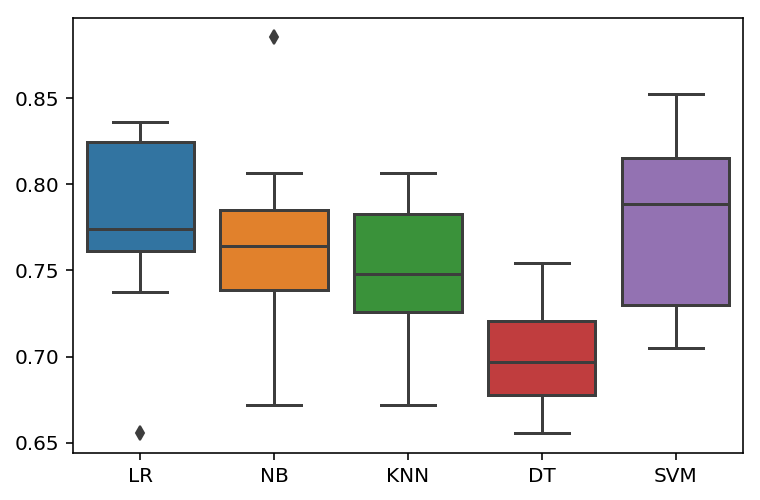

In [73]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

# 8) Final Prediction using Test Data
Logistic Regression and SVM provides maximum results.

In [74]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [76]:
print(accuracy_score(Y_test,predictions))

0.7142857142857143


In [77]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)

In [78]:
print(accuracy_score(Y_test,predictions))

0.7337662337662337


In [79]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



In [80]:
confusion = confusion_matrix(Y_test,predictions)

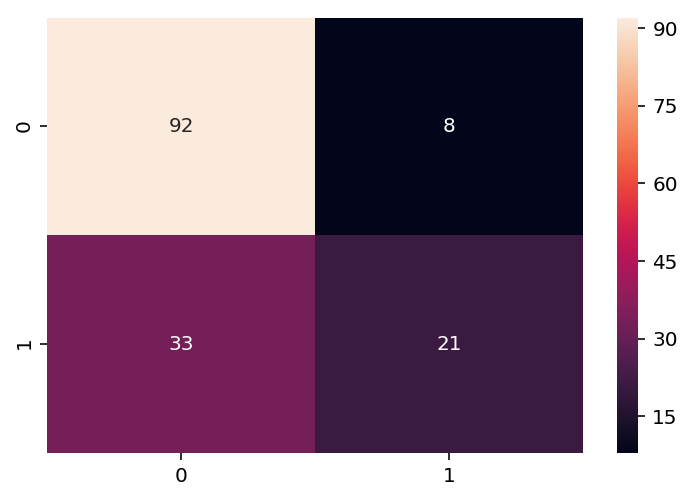

In [81]:
label = ["0","1"]
sns.heatmap(confusion, annot=True, xticklabels=label, yticklabels=label)

In [ ]:
# accuracy
# precision
# recall